<h1> <center> Aprendizaje no Supervisado </center> </h1>
<p> En este campo se encuentran un conjunto de algoritmos que buscan segregar un conjunto de datos a tráves de sus caracteristicas ocultas subyacentes, lo que permite la identificación de la estructura oculta de los mismo y es útil para tareas de detección de anomalias. </p>
<p> Existen dos subcampos de trabajo en el no supervisado, del cual tenemos:
    <ul>
        <li> Paramétrico: Los datos siguen una distribución de probabilidad </li>
        <li> No paramétrico: Los datos se agrupan en grupos que permiten identificar clases y categorías. Se usan en muestras pequeñas. </li>
    </ul>
</p>
        
<p> Así, el aprendizaje no supervisado busca:
    <ul>
        <li> Encontrar patrones en los datos </li>
        <li> Segmentación de individuos para trabajar a través de sus grupos: Balanceo </li>
    </ul>
</p>

## Clustering
Es una técnica de agrupamiento de información que busca identificar la estructura oculta de lo mismos a través de la similitud de sus características, sin el uso de etiquetas.
Se clasifican en:
* Agrupamiento exclusivo
* Superposición de cluster: Conjutos difusos para agrupar datos con grados de membresia
* Agrupamiento jerárquico: Unión entre clusters cercanos
* Agrupación probabilistica

## K-means
K-means clustering es un algoritmo que agrupa las observaciones en K clusters distintos, siendo el K determinado de modo ```ad-hoc```. Es así que, este algoritmo encuentra los K mejores clusters, entendiendo como mejor cluster aquel cuya varianza interna (intra-cluster variation) sea lo más pequeña. Por lo que, la varianza interna puede entenderse como:

$$W(C_{k}) = \sum_{x_{i}\epsilon C_{k}}{(x_{i}-\mu_{i})}$$

### Algoritmo

Para implementar el algoritmo de K-means clustering si tiene lo siguiente: 

1. Especificar el número K de clusters que se quieren crear.
2. Seleccionar de forma aleatoria k observaciones del set de datos como centroides iniciales.
3. Asignar cada una de las observaciones al centroide más cercano.
4. Para cada uno de los K clusters recalcular su centroide.
5. Repetir los pasos 3 y 4 hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones establecido.

### Ventajas y desventajas

K-means es uno de los métodos de clustering más utilizados, el cual se destaca por la sencillez y velocidad, sin embargo, presenta una serie de limitaciones que se deben tener en cuenta.

* Requiere que se indique de antemano el número de clusters que se van a crear. Esto puede ser complicado si no se dispone de información adicional sobre los datos con los que se trabaja. Se han desarrollado varias estrategias para ayudar a identificar potenciales valores óptimos de K, aunque todas ellas son orientativas.

* Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides. Para minimizar este problema se recomienda repetir el proceso de clustering entre 25-50 veces y seleccionar como resultado definitivo el que tenga menor suma total de varianza interna. Aun así, solo se puede garantizar la reproducibilidad de los resultados si se emplean semillas.

* Presenta problemas de robustez frente a outliers. La única solución es excluirlos o recurrir a otros métodos de clustering más robustos como K-medoids (PAM). 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('seaborn-whitegrid')

La base ```analisis``` contiene la lista de 140 famosos, y:

* usuario: (el nombre en Twitter)
* op = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
* co =Conscientiousness – grado de orden, prolijidad, organización
* ex = Extraversion – grado de timidez, solitario o participación ante el grupo social
* ag = Agreeableness – grado de empatía con los demás, temperamento
* ne = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
* Wordcount – Cantidad promedio de palabras usadas en sus tweets
* Categoria – Actividad laboral del usuario (actor, cantante, etc.)Actor/actriz
    1. Cantante
    2. Modelo
    3. Tv, series
    4. Radio
    5. Tecnología
    6. Deportes
    7. Politica
    8. Escritor


In [9]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [10]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [11]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Dispersión de los datos

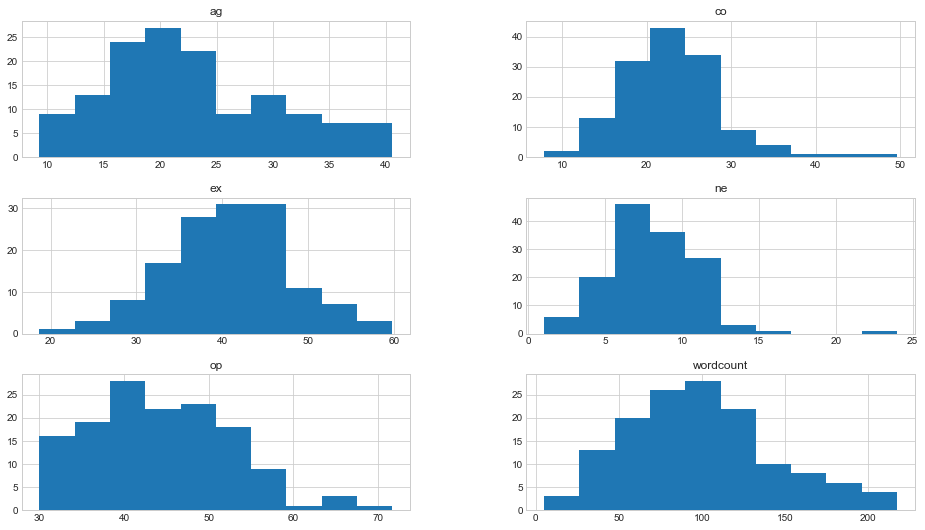

In [12]:
dataframe.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


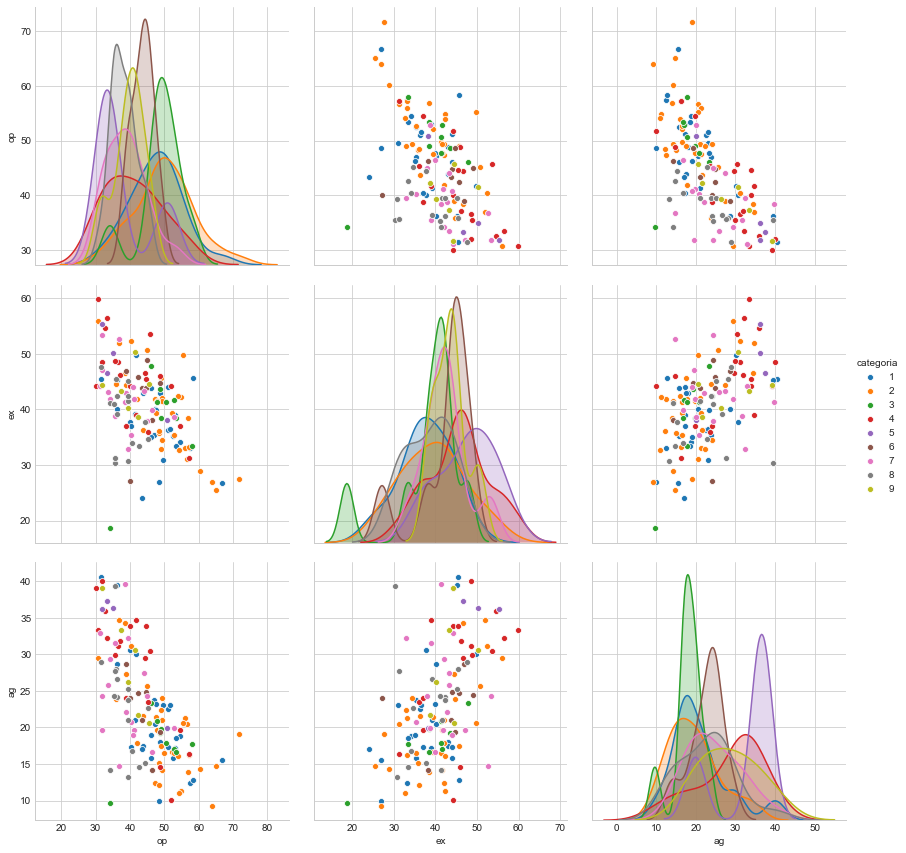

In [13]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter');

In [16]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

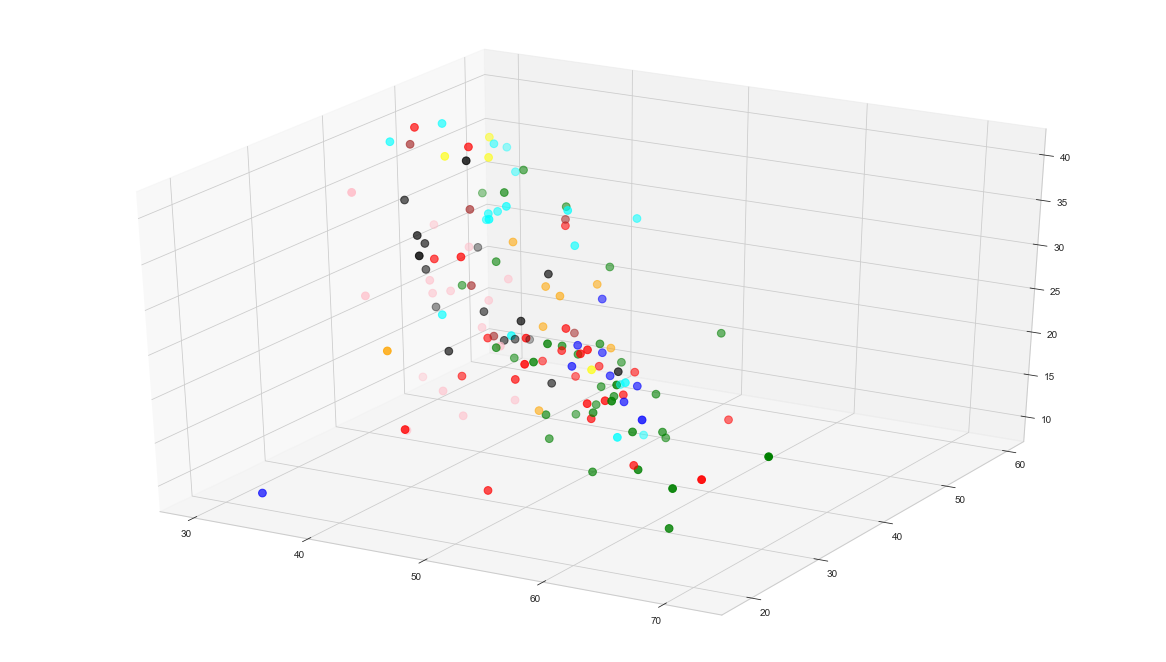

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

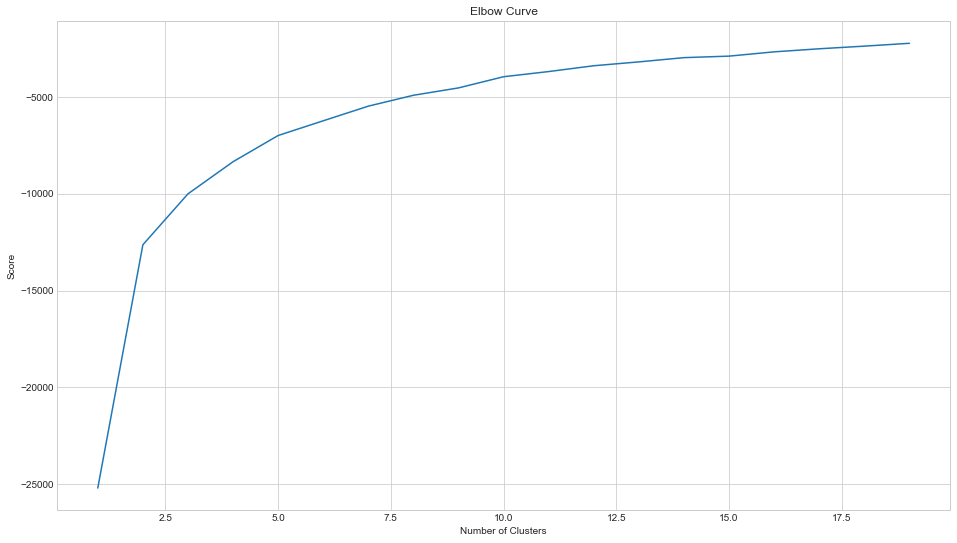

In [18]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[50.42588653 40.66723528 17.30892462]
 [35.90241306 47.56828232 33.58748762]
 [42.75925435 32.7509888  21.08881555]
 [58.70462307 30.53566167 15.72207033]
 [40.14744474 43.54690971 23.11790265]]


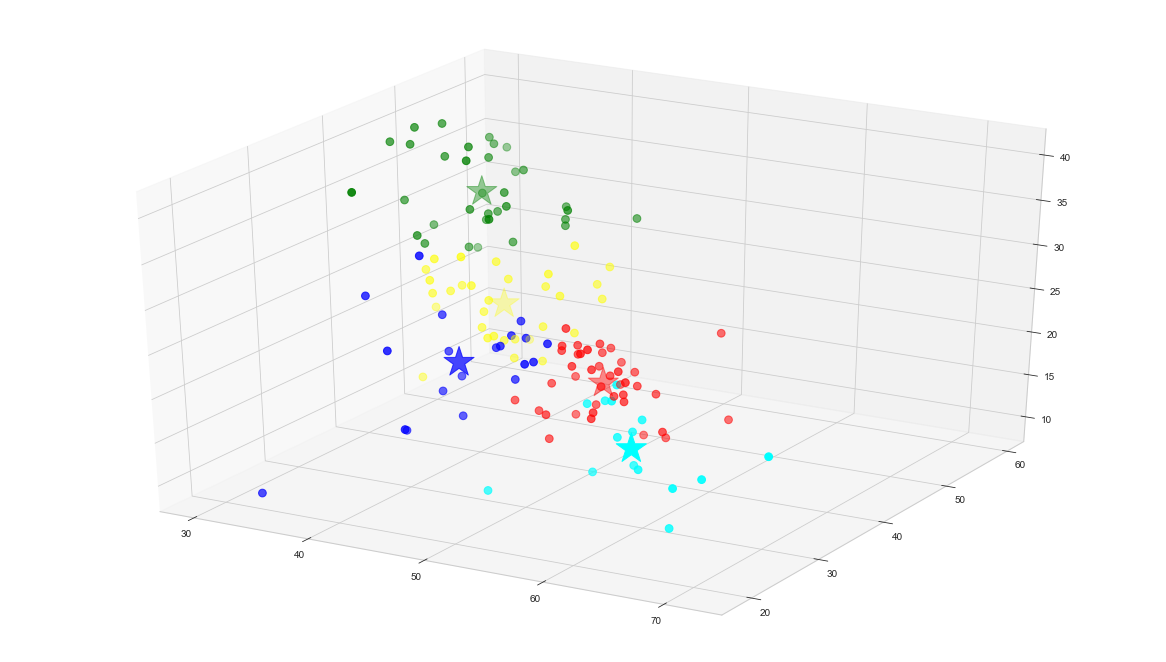

In [20]:
# Predecir clusters
labels = kmeans.predict(X)
# Obtener centros
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

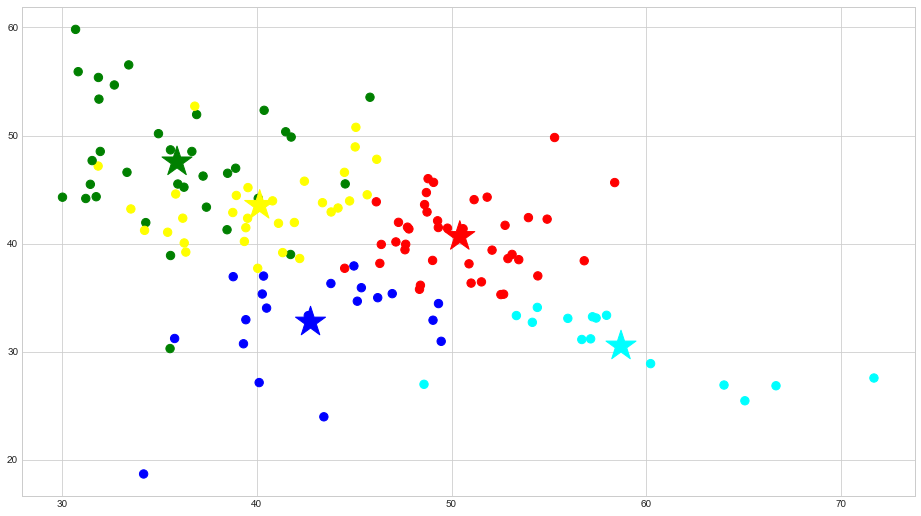

In [21]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

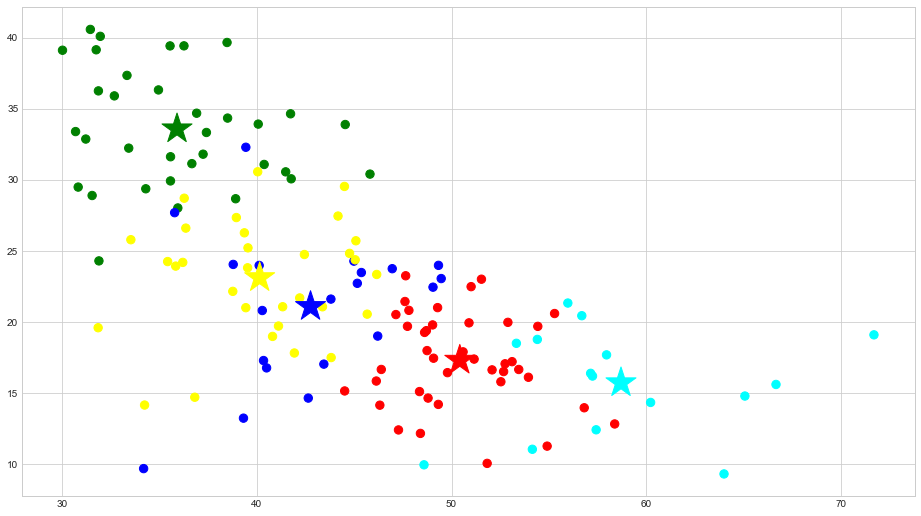

In [22]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

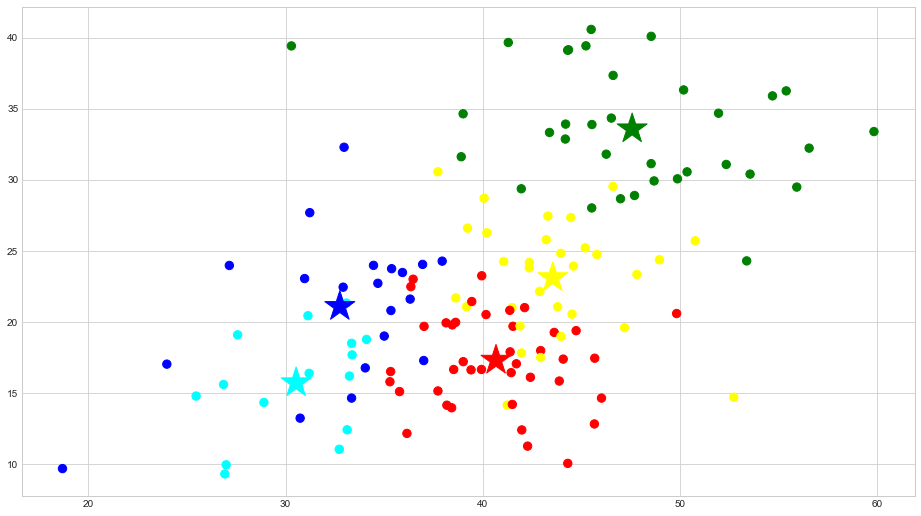

In [23]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [24]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,40
1,green,34
2,blue,20
3,cyan,15
4,yellow,31


In [25]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,10.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,NaN


In [26]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 21,  98, 120,  82,  64])

In [27]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
maria_patino
SarahPalinUSA
JudgeJudy
ierrejon


In [28]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[4]


## Cluster Jerarquico
```Hierarchical clustering``` es un algoritmo de clustering que no requiere que se pre-especifique el número de clusters. Los métodos que engloba el hierarchical clustering se subdividen en dos tipos dependiendo de la estrategia seguida para crear los grupos:

* Agglomerative clustering (bottom-up): el agrupamiento se inicia en la base del árbol, donde cada observación forma un cluster individual. Los clusters se van combinado a medida que la estructura crece hasta converger en una única “rama” central.

* Divisive clustering (top-down): es la estrategia opuesta al agglomerative clustering, se inicia con todas las observaciones contenidas en un mismo cluster y se suceden divisiones hasta que cada observación forma un cluster individual.

En ambos casos, los resultados pueden representarse de forma muy intuitiva en una estructura de árbol llamada dendrograma. 

### Agglomerative
La estructura resultante de un agglomerative hierarchical clustering se obtiene mediante un algoritmo sencillo:

1. El proceso se inicia considerando cada una de las observaciones como un cluster individual, formando así la base del dendrograma (hojas).

2. Se inicia un proceso iterativo hasta que todas las observaciones pertenecen a un único cluster:

    1. Se calcula la distancia entre cada posible par de los n clusters. El investigador debe determinar el tipo de medida emplea para cuantificar la similitud entre observaciones o grupos (distancia y linkage).

    2. Los dos clusters más similares se fusionan, de forma que quedan n-1 clusters.
3. Determinar dónde cortar la estructura de árbol generada (dendrograma).

Para que el proceso de agrupamiento pueda llevarse a cabo tal como indica el algoritmo anterior, es necesario definir cómo se cuantifica la similitud entre dos clusters. Es decir, se tiene que extender el concepto de distancia entre pares de observaciones para que sea aplicable a pares de grupos, cada uno formado por varias observaciones. A este proceso se le conoce como linkage. A continuación, se describen los 5 tipos de linkage más empleados y sus definiciones.

* **Complete or Maximum:** Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La mayor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida más conservadora (maximal intercluster dissimilarity).

* **Single or Minimum:** Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La menor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida menos conservadora (minimal intercluster dissimilarity).

* **Average:** Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. El valor promedio de todas ellas se selecciona como la distancia entre los dos clusters (mean intercluster dissimilarity).

* **Centroid:** Se calcula el centroide de cada uno de los clusters y se selecciona la distancia entre ellos como la distancia entre los dos clusters.

* **Ward:** Se trata de un método general. La selección del par de clusters que se combinan en cada paso del agglomerative hierarchical clustering se basa en el valor óptimo de una función objetivo, pudiendo ser esta última cualquier función definida por el analista. El conocido método Ward’s minimum variance es un caso particular en el que el objetivo es minimizar la suma total de varianza intra-cluster. En cada paso, se identifican aquellos 2 clusters cuya fusión conlleva menor incremento de la varianza total intra-cluster. 

Los métodos de linkage complete, average y Ward’s minimum variance suelen ser los preferidos por los analistas debido a que generan dendrogramas más compensados. Sin embargo, no se puede determinar que uno sea mejor que otro, ya que depende del caso de estudio en cuestión. Por ejemplo, en genómica, se emplea con frecuencia el método de centroides. Junto con los resultados de un proceso de hierarchical clustering siempre hay que indicar qué distancia se ha empleado, así como el tipo de linkage, ya que, dependiendo de estos, los resultados pueden variar en gran medida. 


In [37]:
# Clustering Jerárquico
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Carga del conjunto de datos
customer_data = pd.read_csv('shoping.csv')
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
data = customer_data.iloc[:, 3:5].values

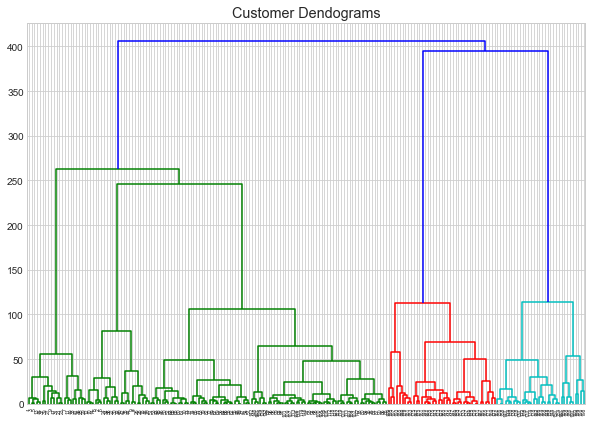

In [41]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = sch.dendrogram(sch.linkage(data, method='ward'))

In [42]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

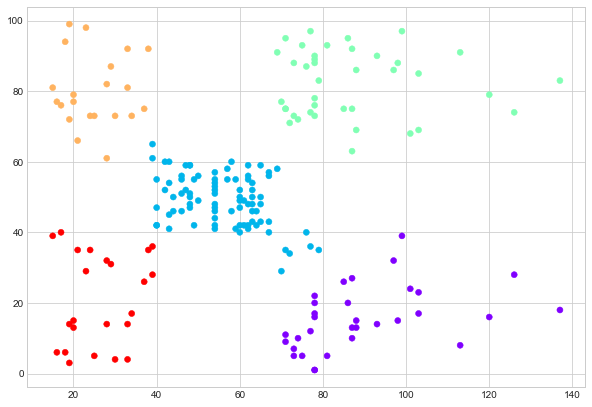

In [43]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')